In [210]:
import pandas as pd
import jieba
import numpy as np

### 数据源：http://www.sogou.com/labs/resource/list_news.php ###

In [154]:
df_news = pd.read_table('./data/val.txt',names=['category','theme','URL','content'],encoding='UTF-8')#自己起列名，因为是中文，设置UTF-8
df_news = df_news.dropna()#有一列缺失值就去除
df_news.head

<bound method NDFrame.head of      category                                 theme  \
0          汽车  新辉腾　４．２　Ｖ８　４座加长Ｉｎｄｉｖｉｄｕａｌ版２０１１款　最新报价   
1          汽车                         ９１８　Ｓｐｙｄｅｒ概念车   
2          汽车              日内瓦亮相　ＭＩＮＩ性能版／概念车－１．６Ｔ引擎   
3          汽车                清仓大甩卖一汽夏利Ｎ５威志Ｖ２低至３．３９万   
4          汽车                    大众敞篷家族新成员　高尔夫敞篷版实拍   
5          汽车            悦翔两厢　１．５　ＡＴ　舒适型　２０１０款　最新报价   
6          汽车            戈蓝　２．４　ＡＴ　旗舰升级版　２０１２款　最新报价   
7          汽车                                华泰　宝利格   
8          汽车                  酷似卡宴　华泰新ＳＵＶ宝利格广州车展上市   
9          汽车               最受欢迎ＴＯＰ１０车型出炉　帝豪ＥＣ７脱颖而出   
10         汽车                         Ｍａｚｄａ３　２．０　ＭＴ   
11         汽车             对手锁定ＧＴＩ　西雅特ＬＥＯＮ　ＣＵＰＲＡ到店实拍   
12         汽车                 九江理念Ｓ１享３０００元惠民补贴　店内现车   
13         汽车     自由客Ｐａｔｒｉｏｔ　２．４　ＣＶＴ　经典版　２０１１款　最新报价   
14         汽车                   嘉路Ｇａｌｕｅ　ｃｏｎｖｅｒｔｉｂｌｅ   
15         汽车                        乌兰浩特联舰汽车贸易有限公司   
16         汽车              明锐　２．０　Ａ

In [155]:
df_news.shape

(5000, 4)

### 分词：使用结巴分词 ###

In [208]:
content = df_news.content.values.tolist()#输入list结构进行分词，表-列名-值-转列表
print(content[2])#显示其中一条内容
print(len(content))

ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展上，ＭＩＮＩ品牌带来了全新的ＣＯＵＮＴＲＹＭＡＮ　ＪＣＷ版和Ｃｌｕｂｖａｎ概念车以及更多ＪＣＷ性能版车型亮相。＃停桑危伞。茫希眨危裕遥伲停粒巍。剩茫装嬖谕夤凵媳浠非常明显，其加装了空气动力学套件外观，并且针对个性的性能版车型采用了非常吸引眼球的黑色车身配红色车顶以及红色拉花的搭配。新款车型在性能上也做了改进，采用１８英寸合金轮毂，高性能刹车套件以及运动化悬挂组件，配合运动版尾排以及车侧的ＪＣＷ徽标彰显着这是一款体现性能的车型。＃停桑危伞。茫希眨危裕遥伲停粒巍。剩茫装嬖诙力上搭载的是一款１６０千瓦的１．６升涡轮增压引擎，最大扭矩３００牛米，同时还配有全轮驱动系统，百公里加速仅需７．０秒，极速被限制在２２５ｋｍ／ｈ或２２３ｋｍ／ｈ（选装６速自动变速箱）。．．．全文　＞　（来源：网上车市）
5000


In [157]:
content_S = []
for line in content:
    current_segment = jieba.lcut(line)
    if len(current_segment)>1 and current_segment !='\r\n':#换行符
        content_S.append(current_segment)

In [158]:
print(content_S[2])#看其中一条的分词结果

['Ｍ', 'Ｉ', 'Ｎ', 'Ｉ', '品牌', '在', '二月', '曾经', '公布', '了', '最新', '的', 'Ｍ', 'Ｉ', 'Ｎ', 'Ｉ', '新', '概念车', 'Ｃ', 'ｌ', 'ｕ', 'ｂ', 'ｖ', 'ａ', 'ｎ', '效果图', '，', '不过', '现在', '在', '日内瓦', '车展', '上', '，', 'Ｍ', 'Ｉ', 'Ｎ', 'Ｉ', '品牌', '带来', '了', '全新', '的', 'Ｃ', 'Ｏ', 'Ｕ', 'Ｎ', 'Ｔ', 'Ｒ', 'Ｙ', 'Ｍ', 'Ａ', 'Ｎ', '\u3000', 'Ｊ', 'Ｃ', 'Ｗ', '版', '和', 'Ｃ', 'ｌ', 'ｕ', 'ｂ', 'ｖ', 'ａ', 'ｎ', '概念车', '以及', '更', '多', 'Ｊ', 'Ｃ', 'Ｗ', '性能', '版', '车型', '亮相', '。', '＃', '停桑', '危伞', '。', '茫希', '眨', '危裕遥', '伲', '停粒巍', '。', '剩茫装', '嬖', '谕', '夤', '凵', '媳', '浠', '非常明显', '，', '其', '加装', '了', '空气', '动力学', '套件', '外观', '，', '并且', '针对', '个性', '的', '性能', '版', '车型', '采用', '了', '非常', '吸引', '眼球', '的', '黑色', '车身', '配', '红色', '车顶', '以及', '红色', '拉花', '的', '搭配', '。', '新款', '车型', '在', '性能', '上', '也', '做', '了', '改进', '，', '采用', '１', '８', '英寸', '合金', '轮毂', '，', '高性能', '刹车', '套件', '以及', '运动', '化', '悬挂', '组件', '，', '配合', '运动版', '尾排', '以及', '车侧', '的', 'Ｊ', 'Ｃ', 'Ｗ', '徽标', '彰显', '着', '这', '是', '一款', '体现', '性能', '的', '车型', '。', '＃', '停桑', '危伞', '。', '茫希', '眨', 

In [159]:
df_content = pd.DataFrame({'content_S':content_S})#以键值对的方式把内容放入DataFrame
df_content.head()

,content_S
0,"[经销商, , 电话, , 试驾, ／, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, ..."
1,"[呼叫, 热线, , ４, ０, ０, ８, －, １, ０, ０, －, ３, ０, ０..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 在, 二月, 曾经, 公布, 了, 最新, 的, Ｍ, Ｉ..."
3,"[清仓, 大, 甩卖, ！, 一汽, 夏利, Ｎ, ５, 、, 威志, Ｖ, ２, 低至, ..."
4,"[在, 今年, ３, 月, 的, 日内瓦, 车展, 上, ，, 我们, 见到, 了, 高尔夫..."


### 清洗数据 去除停用词####

In [217]:
stopwords = pd.read_csv("stopwords.txt",sep='\t',quoting=3,names=['stopword'],encoding="UTF-8")#自己定义列名
stopwords.head(20)#显示前20个

,stopword
0,!
1,""""
2,#
3,$
4,%
5,&
6,'
7,(
8,)
9,*


In [219]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))
        contents_clean.append(line_clean)
    return contents_clean,all_words

contents = df_content.content_S.values.tolist()#注意格式
stopwords = stopwords.stopword.values.tolist()
contents_clean, all_words = drop_stopwords(contents,stopwords)

AttributeError: 'DataFrame' object has no attribute 'content_S'

In [162]:
df_content = pd.DataFrame({'contents_clean':contents_clean})
df_content.head()


,contents_clean
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ..."
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,..."
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念..."
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ..."
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,..."


In [165]:
df_all_words = pd.DataFrame({"all_words":all_words})
df_all_words.head()

,all_words
0,经销商
1,电话
2,试驾
3,订车
4,Ｕ


In [166]:
words_count = df_all_words.groupby(by=['all_words'])['all_words'].agg({"count":np.size})# 得到每个单词的词频
words_count = words_count.reset_index().sort_values(by=["count"],ascending=False)#按词频进行排序
words_count.head(20)

C:\Users\16538\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  if __name__ == '__main__':


,all_words,count
4077,中,5199
4209,中国,3115
88255,说,3055
104747,Ｓ,2646
1373,万,2390
104748,Ｔ,2310
104757,ａ,2306
104765,ｉ,2287
104761,ｅ,2270
104771,ｏ,2236


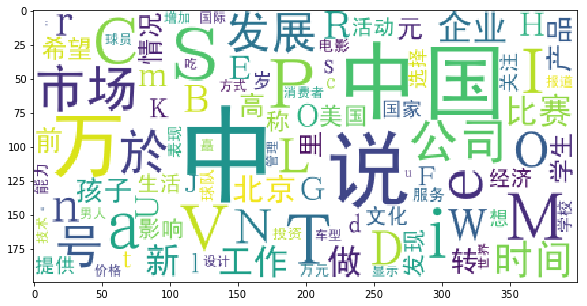

In [167]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = {10.0,5.0}

wordcloud = WordCloud(font_path='./data/simhei.ttf',background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud = wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

### TF-IDF:提取关键词 ###

In [209]:
import jieba.analyse
index = 2
print(df_news['content'][index])
content_S_str = "".join(content_S[index])
print("\n")
print(" ".join(jieba.analyse.extract_tags(content_S_str,topK=5,withWeight=False)))

ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展上，ＭＩＮＩ品牌带来了全新的ＣＯＵＮＴＲＹＭＡＮ　ＪＣＷ版和Ｃｌｕｂｖａｎ概念车以及更多ＪＣＷ性能版车型亮相。＃停桑危伞。茫希眨危裕遥伲停粒巍。剩茫装嬖谕夤凵媳浠非常明显，其加装了空气动力学套件外观，并且针对个性的性能版车型采用了非常吸引眼球的黑色车身配红色车顶以及红色拉花的搭配。新款车型在性能上也做了改进，采用１８英寸合金轮毂，高性能刹车套件以及运动化悬挂组件，配合运动版尾排以及车侧的ＪＣＷ徽标彰显着这是一款体现性能的车型。＃停桑危伞。茫希眨危裕遥伲停粒巍。剩茫装嬖诙力上搭载的是一款１６０千瓦的１．６升涡轮增压引擎，最大扭矩３００牛米，同时还配有全轮驱动系统，百公里加速仅需７．０秒，极速被限制在２２５ｋｍ／ｈ或２２３ｋｍ／ｈ（选装６速自动变速箱）。．．．全文　＞　（来源：网上车市）


车型 性能 停桑 危伞 茫希


### LDA:主题模型 ###
格式要求：list of list形式，分词好的整个语料
主题，文章，词

In [169]:
import gensim
from gensim import corpora,models,similarities

In [173]:
#做映射，相当于词袋
dictionary = corpora.Dictionary(contents_clean)#把语料库做成字典，比如‘今天’是1，'明天'是2。。词袋模型
corpus = [dictionary.doc2bow(sentence) for sentence in contents_clean]#在每一个sentence中都去做词袋模型这个东西

In [174]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20)

In [175]:
print(lda.print_topic(1,topn=5))#打印出第一类主题的词

0.005*"中" + 0.005*"男人" + 0.004*"说" + 0.003*"训练" + 0.003*"赛季"


In [176]:
for topic in lda.print_topics(num_topics=20,num_words=5):#打印出20个主题内容
    print(topic[1])

0.005*"中" + 0.004*"说" + 0.004*"卫视" + 0.002*"於" + 0.002*"岁"
0.005*"中" + 0.005*"男人" + 0.004*"说" + 0.003*"训练" + 0.003*"赛季"
0.006*"比赛" + 0.005*"中" + 0.004*"高考" + 0.004*"说" + 0.003*"考试"
0.006*"爆料" + 0.005*"中" + 0.003*"万" + 0.003*"号" + 0.002*"研究生"
0.006*"表演" + 0.003*"中" + 0.003*"中国" + 0.003*"Ｐ" + 0.003*"说"
0.006*"中" + 0.003*"Ｄ" + 0.002*"皮肤" + 0.002*"肌肤" + 0.002*"中国"
0.010*"男人" + 0.009*"女人" + 0.008*"说" + 0.005*"中" + 0.004*"麽"
0.005*"中" + 0.004*"说" + 0.004*"孩子" + 0.003*"Ｔ" + 0.003*"吃"
0.007*"中" + 0.004*"说" + 0.003*"电影" + 0.003*"故事" + 0.002*"恋情"
0.007*"中" + 0.005*"中国" + 0.005*"张绍" + 0.005*"美国" + 0.003*"决赛"
0.009*"中" + 0.006*"男人" + 0.006*"女人" + 0.005*"电影" + 0.005*"比赛"
0.024*"ａ" + 0.021*"ｅ" + 0.017*"ｉ" + 0.016*"ｏ" + 0.016*"ｎ"
0.010*"万" + 0.005*"号" + 0.004*"男人" + 0.004*"专辑" + 0.003*"Ｋ"
0.010*"球队" + 0.008*"选手" + 0.005*"中" + 0.004*"Ｖ" + 0.004*"Ｓ"
0.008*"饰演" + 0.006*"中" + 0.004*"说" + 0.003*"官兵" + 0.003*"导师"
0.006*"考生" + 0.006*"中" + 0.004*"节目" + 0.003*"说" + 0.003*"Ｎ"
0.014*"观众" + 0.005*"李小璐" + 0.005*"

In [180]:
df_train = pd.DataFrame({'contents_clean':contents_clean,'label':df_news['category']})
df_train.tail()

,contents_clean,label
4995,"[天气, 炎热, 补水, 变得, 美国, 跑步, 世界, 杂志, 报道, 喝水, 身体, 补...",时尚
4996,"[不想, 说, 话, 刺激, 说, 做, 只能, 走, 离开, 伤心地, 想起, 一句, 话...",时尚
4997,"[岁, 刘晓庆, 最新, 嫩照, Ｏ, 衷, 诘, 牧跸, 庆, 看不出, 岁, 秒杀, 刘...",时尚
4998,"[导语, 做, 爸爸, 一种, 幸福, 无论是, 领养, 亲生, 更何况, 影视剧, 中, ...",时尚
4999,"[全球, 最美, 女人, 合成图, 国, 整形外科, 教授, 李承哲, 国际, 学术, 杂志...",时尚


In [181]:
df_train.label.unique()

array(['汽车', '财经', '科技', '健康', '体育', '教育', '文化', '军事', '娱乐', '时尚'],
      dtype=object)

In [182]:
label_mapping = {"汽车":1,"财经":2,"科技":3,"健康":4,"体育":5,"教育":6,"文化":7,"军事":8,"娱乐":9,"时尚":10}
df_train['label'] = df_train['label'].map(label_mapping)
df_train.head()

,contents_clean,label
0,"[经销商, 电话, 试驾, 订车, Ｕ, 憬, 杭州, 滨江区, 江陵, 路, 号, 转, ...",1
1,"[呼叫, 热线, 服务, 邮箱, ｋ, ｆ, ｐ, ｅ, ｏ, ｐ, ｌ, ｅ, ｄ, ａ,...",1
2,"[Ｍ, Ｉ, Ｎ, Ｉ, 品牌, 二月, 公布, 最新, Ｍ, Ｉ, Ｎ, Ｉ, 新, 概念...",1
3,"[清仓, 甩卖, 一汽, 夏利, Ｎ, 威志, Ｖ, 低至, 万, 启新, 中国, 一汽, ...",1
4,"[日内瓦, 车展, 见到, 高尔夫, 家族, 新, 成员, 高尔夫, 敞篷版, 款, 全新,...",1


In [183]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_train['contents_clean'].values,df_train['label'].values)

In [195]:
x_train[0][0]

'关注'

In [212]:
words = []
for line_index in range(len(x_train)):
    words.append(" ".join(x_train[line_index]))#连接
   
        #print(line_index,word_index)
words[2]

'雅虎 体育讯 欧洲杯 半决赛 此刻 四支 球队 既难 掩 心中 渴望 任重道远 倒 决赛 门槛 前 上演 远在天边 近在眼前 悲惨 一幕 半决赛 成就 太 经典 画面 本文 盘点 欧洲杯 历史 激动人心 半决赛 薄 ⅲ 保梗福茨 攴 ü 加时赛 葡萄牙 保梗福茨 攴 ü 葡萄牙 这场 半决赛 欧洲杯 历史 精彩 一战 分钟 内战 成 平手 比赛 加时 分钟 葡萄牙 若尔当 本场 比赛 打进 球 成功 反超 正当 所有人 葡萄牙 逆转 胜出 法国 爆发 强大 斗志 分钟 多梅 尔格 成功 梅开二度 法国 比分 扳平 值得一提的是 多梅 尔格 国家队 生涯 中 一共 打进 两球 Ｑ 劭 幢 热 点球 大战 普拉蒂尼 分钟 挺身而出 打进 制胜球 法国 绝杀 葡萄牙 成功 晋级 决赛'

把一句话转化成一个向量

In [206]:
from sklearn.feature_extraction.text import CountVectorizer
texts = ['dog cat fish','dog cat cat','fish bird','bird']#输入要求格式
#cv = CountVectorizer()
cv = CountVectorizer(ngram_range=(1,4))
#如果是一个单词，则只有4种组合，而1，4可以有更多组合，向量维度会更大，一般设置2， 多了向量会稀疏
cv_fit = cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())
print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'cat cat', 'cat fish', 'dog', 'dog cat', 'dog cat cat', 'dog cat fish', 'fish', 'fish bird']
[[0 1 0 1 1 1 0 1 1 0]
 [0 2 1 0 1 1 1 0 0 0]
 [1 0 0 0 0 0 0 0 1 1]
 [1 0 0 0 0 0 0 0 0 0]]
[2 3 1 1 2 2 1 1 2 1]


In [207]:
from sklearn.feature_extraction.text import CountVectorizer
texts = ['dog cat fish','dog cat cat','fish bird','bird']#输入要求格式
cv = CountVectorizer()
cv_fit = cv.fit_transform(texts)

print(cv.get_feature_names())
print(cv_fit.toarray())
print(cv_fit.toarray().sum(axis=0))

['bird', 'cat', 'dog', 'fish']
[[0 1 1 1]
 [0 2 1 0]
 [1 0 0 1]
 [1 0 0 0]]
[2 3 2 2]


In [198]:
#按照规则去转化
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(analyzer='word',max_features=4000,lowercase=False)
vec.fit(words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [199]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vec.transform(words),y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [201]:
#对测试文档的处理
test_words = []
for line_index in range(len(x_test)):
    test_words.append(" ".join(x_test[line_index]))
test_words[0]

'网上 车市 南京站 讯 欧洲杯 如火如荼 中 南京 品牌 经销商 推出 各项 优惠活动 力求 抓住 热潮 逆袭 网上 车市 整理 本周 南京 车市 价格行情 信息 优惠 万元 不乏 车友 关注 热门 车型 大众 帕萨特 标致 歌诗图 希望 本篇 文章 挑选 爱车 提供 便利 局 苤 星 讴歌 Ｍ Ｄ Ｘ 停模厥 豢 罱 运动 优雅 Ｓ Ｕ Ｖ 讴歌 高端 品牌 推出 主力 车型 活跃 北美 市场 Ｓ Ｕ Ｖ 舒适 宽敞 内部空间 占据 优势 此番 宁润 经销商 推出 讴歌 Ｍ Ｄ Ｘ 款 全系 优惠 万元 详情 Ｚ └ 枳 魑 高端 品牌 拥 精湛 工艺 打造 完美 汽车 追求 Ｍ Ｄ Ｘ 级别 Ｓ Ｕ Ｖ 中 拥有 独特 优势 清晰 简洁 外形 设计 出色 内饰 空间 丰富多彩 科技 配置 一度 好评 纬凳 谐 ↓ 笾 谂 寥特 Ｈ 新 帕萨特 稳重 大气 外表 拥有 舒适 驾驶 环境 宽敞 乘坐 空间 展现 车迷 朋友 完美 印象 符合 时尚 汽车 设计 全新 车身 体现 大众 最新 家族式 风格 南京 金鹰 苏星 上海大众 Ｓ 店 推出 新 帕萨特 车型 优惠 万 赠 元 装潢 礼 详情 Ｈ 新 帕萨特 整体 造型 全新 帕萨特 依旧 延续 大众 经典 设计 理念 相比 一代 新 帕萨特 提升 上海大众 旗下 战略 旗舰 车型 全新 帕萨特 外观 细节 设计 内饰 做工 科技 配置 与时俱进 曛 拢 矗 埃庚 风 标致 拥有 ＂ 广域 超 尺寸 空间 ＂ 设计 理念 最新 力作 时尚 大气 车身 造型 度 宽敞 舒适 空间 全方位 清晰 无界 视野 体贴 安心 内饰 质感 钢筋铁骨 装备 令 驾乘 座舱 瞬间 即可 领略 超然 气度 尽享 从容 自在 驾乘 感受 近日 网上 车市 编辑 东风 标致 南京 天泓标 远店 获悉 东风 标致 纪念版 优惠 元 送 元 装潢 现车 详情 Ｕ 宣传语 所说 ＂ ＂ 标致 吸引 中国 消费者 关键 条件 空间 更大 乘坐 舒适 装载 东西 一款 十几万元 级别 家用车 无疑 实惠 喜欢 车友们 进一步 经销商 Ｋ 箍 麓 镪 蝗 颀 Ｗ 魑 斯柯达 旗下 旗舰 车型 昊锐 全系 搭载 大众 先进 Ｔ Ｓ Ｉ 发动机 出自 大众 Ｂ 级车 底盘 无论是 动力性 操控性 舒适性 级别 车型 相比 占有 优势 近日 网上 车市

In [202]:
#基本贝叶斯
classifier.score(vec.transform(test_words),y_test)

0.8056

In [203]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer='word',max_features=4000,lowercase=False)
vectorizer.fit(words)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [204]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(vectorizer.transform(words),y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [220]:
#基于TF-idf
classifier.score(vectorizer.transform(test_words),y_test)

0.808